In [109]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [110]:
subDataFile = ".\\dataProfitMarginSubset.csv"
subsetData = pd.read_csv(subDataFile)
subsetData.head(3)

,id,title,production_companies,production_countries,adult,popularity,release_date,runtime,vote_average,vote_count,...,screenwriterTot_RankedAveRating,editorTot_AveRating,editorTot_RankedAveRating,keywordTot_AveRating,genreTot_RankedAveRating,budget,revenue,Domestic,BoxOfficeProfitMargin,profit_margin
0,862,Toy Story,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",True,21.946943,1995-10-30,81.0,7.7,5415.0,...,5.3000,6.125,16.847480,6.378346,5.913436,30000000.0,373554033.0,223225679.0,644.085597,1145.18011
1,8844,Jumanji,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",True,17.015539,1995-12-15,104.0,6.9,2413.0,...,7.7375,6.450,8.224377,6.078460,5.739320,65000000.0,262797249.0,100499940.0,54.615292,304.30346
2,15602,Grumpier Old Men,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",True,11.712900,1995-12-22,101.0,6.5,92.0,...,NaN,NaN,NaN,6.144337,5.756752,25000000.0,71500000.0,71518503.0,186.074012,186.00000


In [111]:
print("Shape with null vals {0}".format(subsetData.shape))
subNonNull = subsetData.dropna()
print("Shape with null vals {0}".format(subNonNull.shape))


Shape with null vals (45347, 29)
Shape with null vals (5695, 29)


In [112]:
subNonNull.loc[:,'release_date'] =subNonNull['release_date'].apply(pd.to_datetime)

C:\Users\Karl\anaconda3\lib\site-packages\pandas\core\indexing.py:1675: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


### Summarize Data

In [113]:
print(list(subNonNull.columns))
print(subNonNull.dtypes)

['id', 'title', 'production_companies', 'production_countries', 'adult', 'popularity', 'release_date', 'runtime', 'vote_average', 'vote_count', 'actorsTot_AveRating', 'actorsTot_RankedAveRating', 'actorsTot_VoteAve', 'actorsTot_RankedVoteAve', 'actorsTot_HistAve', 'actorsTot_RankedHistAve', 'directorTot_AveRating', 'directorTot_RankedAveRating', 'screenwriterTot_AveRating', 'screenwriterTot_RankedAveRating', 'editorTot_AveRating', 'editorTot_RankedAveRating', 'keywordTot_AveRating', 'genreTot_RankedAveRating', 'budget', 'revenue', 'Domestic', 'BoxOfficeProfitMargin', 'profit_margin']
id                                          int64
title                                      object
production_companies                       object
production_countries                       object
adult                                        bool
popularity                                float64
release_date                       datetime64[ns]
runtime                                   float64
vote_aver

#### Box Office Profit Margin over time

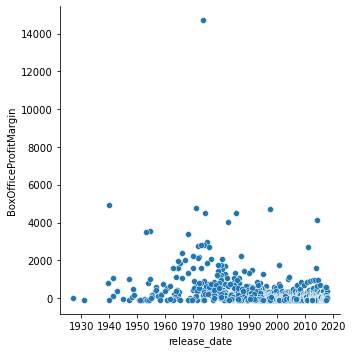

In [114]:
_ = sns.relplot(x='release_date',y='BoxOfficeProfitMargin',data=subNonNull)
plt.show()

### Adult Vs Non Adult Profit Margin over time

In [115]:
adultGrouped = subNonNull.groupby('adult')
adultGrouped['BoxOfficeProfitMargin'].describe()

,count,mean,std,min,25%,50%,75%,max
adult,,,,,,,,
True,5695.0,14.601742,330.156405,-99.978992,-46.64094,-46.64094,-38.380525,14700.514801


#### Only adult films remain in dataset, not useful parameter unfortunately

## Profit margin descriptions

In [116]:
margins = subNonNull[['BoxOfficeProfitMargin','profit_margin']]
margins.describe()

,BoxOfficeProfitMargin,profit_margin
count,5695.000000,5695.000000
mean,14.601742,116.039965
std,330.156405,491.764985
min,-99.978992,-99.999545
25%,-46.640940,10.046017
50%,-46.640940,10.046017
75%,-38.380525,31.677500
max,14700.514801,17918.018018


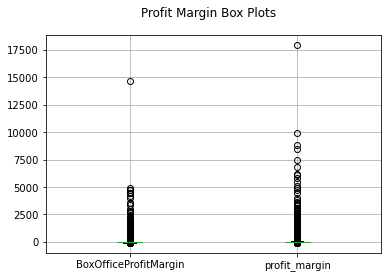

In [117]:
plt.suptitle('Profit Margin Box Plots')
margins.boxplot()
plt.show()

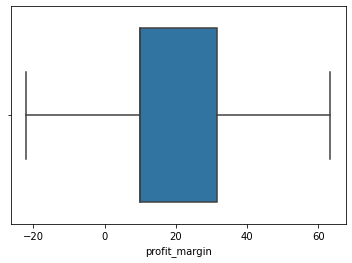

In [118]:
_=sns.boxplot(x = 'profit_margin', data=subNonNull, showfliers=False)
plt.show()

<AxesSubplot:>

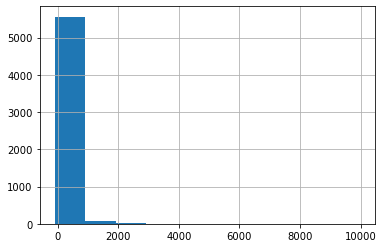

In [119]:
subNonNull[subNonNull['profit_margin']<10000]['profit_margin'].hist()

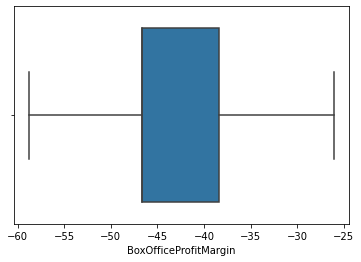

In [120]:
_=sns.boxplot(x = 'BoxOfficeProfitMargin', data=subNonNull, showfliers=False)
plt.show()

<AxesSubplot:>

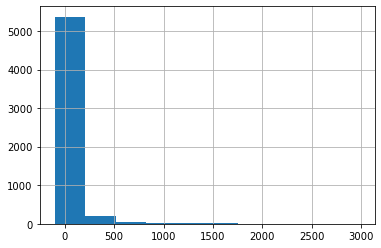

In [121]:
subNonNull[subNonNull['BoxOfficeProfitMargin']<3000]['BoxOfficeProfitMargin'].hist()

##### Both chosen dependent variables are heavily grouped toward the low end 

## Correlation Matrix

In [122]:
subNonNull.corr()

,id,adult,popularity,runtime,vote_average,vote_count,actorsTot_AveRating,actorsTot_RankedAveRating,actorsTot_VoteAve,actorsTot_RankedVoteAve,...,screenwriterTot_RankedAveRating,editorTot_AveRating,editorTot_RankedAveRating,keywordTot_AveRating,genreTot_RankedAveRating,budget,revenue,Domestic,BoxOfficeProfitMargin,profit_margin
id,1.000000,NaN,0.164641,-0.019123,-0.079688,0.210857,-0.022495,0.071156,-0.042597,0.063024,...,0.267352,0.119436,0.201082,-0.313220,-0.045755,0.100554,0.164536,0.124280,0.018167,0.071665
adult,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
popularity,0.164641,NaN,1.000000,0.110708,0.155142,0.539097,0.186105,0.195170,0.180141,0.188772,...,0.142223,0.123052,0.115905,-0.049236,-0.084109,0.381918,0.499938,0.462879,0.064869,0.114258
runtime,-0.019123,NaN,0.110708,1.000000,0.317495,0.202862,0.189999,0.204798,0.195244,0.204243,...,0.137818,0.083213,0.150944,0.117404,0.192683,0.179969,0.197699,0.174059,0.017773,0.062993
vote_average,-0.079688,NaN,0.155142,0.317495,1.000000,0.253022,0.249198,0.112310,0.256435,0.114815,...,-0.069800,-0.042884,-0.155641,0.545827,0.339704,-0.067940,0.120121,0.114280,0.116648,0.149368
vote_count,0.210857,NaN,0.539097,0.202862,0.253022,1.000000,0.209748,0.274716,0.200181,0.265148,...,0.281729,0.222538,0.269742,-0.159587,-0.166147,0.643897,0.830639,0.812534,0.142955,0.235398
actorsTot_AveRating,-0.022495,NaN,0.186105,0.189999,0.249198,0.209748,1.000000,0.715387,0.997175,0.712493,...,-0.090007,0.009370,-0.067819,0.323464,0.109683,0.207343,0.192211,0.157294,-0.079712,-0.050353
actorsTot_RankedAveRating,0.071156,NaN,0.195170,0.204798,0.112310,0.274716,0.715387,1.000000,0.722250,0.998951,...,0.095093,0.089412,0.093291,0.001827,0.003669,0.202823,0.248998,0.247557,0.046744,0.085311
actorsTot_VoteAve,-0.042597,NaN,0.180141,0.195244,0.256435,0.200181,0.997175,0.722250,1.000000,0.721871,...,-0.095812,0.007266,-0.072244,0.334726,0.112746,0.198768,0.184083,0.150307,-0.077863,-0.049050
actorsTot_RankedVoteAve,0.063024,NaN,0.188772,0.204243,0.114815,0.265148,0.712493,0.998951,0.721871,1.000000,...,0.090684,0.088345,0.090056,0.007521,0.005558,0.193964,0.240869,0.239611,0.048179,0.087189


<AxesSubplot:>

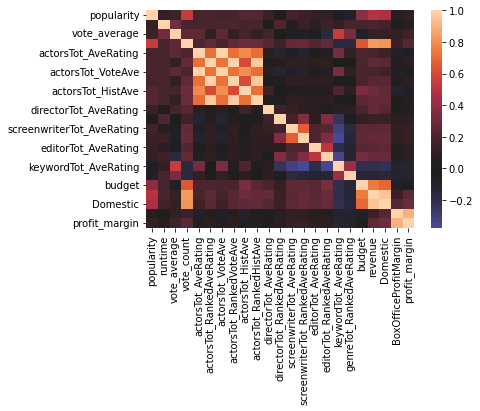

In [123]:
# Make a heatmap of the data 
sns.heatmap(subNonNullNumeric.corr(), center = 0)

#### Seems there's almost no correlation between Box Office Profit Margin with any explanitory variable.  Same for profit_margin.  Linear Regression for these variables not recomended, but Multiple Linear regression may be able to add several weak correlations into something useful

#### There is some correlation between Domestic Box Office with budget, popularity, and vote_count.

## Multiple Linear Regression

### Box Office Profit Margin

In [124]:
import statsmodels.api as sm
from sklearn.model_selection import train_test_split 
# Create test and train datasets
# This is again very similar, but now we include more columns in the predictors
# Include all columns from data in the explanatory variables X except fixed.acidity and quality (which was an integer)
multRegDataX = subNonNullNumeric.loc[:, ~subNonNullNumeric.columns.isin(['BoxOfficeProfitMargin','profit_margin','release_date','budget','revenue','Domestic'])]
multRegDataY = subNonNullNumeric[['BoxOfficeProfitMargin']]

# Create constants for X, so the model knows its bounds
multRegDataX = sm.add_constant(multRegDataX)

# Split the data
X_trainMult, X_testMult, y_trainMult, y_testMult = train_test_split(multRegDataX, multRegDataY, test_size=0.25)

In [125]:
# Create the model
modelMult = sm.OLS(y_trainMult,X_trainMult)

# Fit the model
results = modelMult.fit()

In [126]:
# Evaluate the model
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     BoxOfficeProfitMargin   R-squared:                       0.095
Model:                               OLS   Adj. R-squared:                  0.091
Method:                    Least Squares   F-statistic:                     24.80
Date:                   Sun, 27 Feb 2022   Prob (F-statistic):           4.83e-79
Time:                           23:46:39   Log-Likelihood:                -30708.
No. Observations:                   4272   AIC:                         6.145e+04
Df Residuals:                       4253   BIC:                         6.158e+04
Df Model:                             18                                         
Covariance Type:               nonrobust                                         
===================================================================================================
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                            2211.4446    353.416      6.257      0.000    1518.565    2904.324
popularity                         -0.7008      0.769     -0.911      0.362      -2.208       0.807
runtime                            -1.4720      0.430     -3.425      0.001      -2.315      -0.629
vote_average                      155.0784     13.075     11.861      0.000     129.445     180.712
vote_count                          0.0272      0.007      3.686      0.000       0.013       0.042
actorsTot_AveRating                -0.4162      1.970     -0.211      0.833      -4.279       3.447
actorsTot_RankedAveRating           0.0347      0.038      0.922      0.356      -0.039       0.108
actorsTot_VoteAve                  -0.3029      1.911     -0.158      0.874      -4.050       3.444
actorsTot_RankedVoteAve            -0.0195      0.033     -0.584      0.559      -0.085       0.046
actorsTot_HistAve                  -0.1343      0.047     -2.844      0.004      -0.227      -0.042
actorsTot_RankedHistAve            -0.0003      0.001     -0.276      0.783      -0.002       0.002
directorTot_AveRating             -17.8661      4.849     -3.685      0.000     -27.372      -8.360
directorTot_RankedAveRating         0.8352      0.352      2.370      0.018       0.144       1.526
screenwriterTot_AveRating           5.8808      2.032      2.894      0.004       1.897       9.865
screenwriterTot_RankedAveRating    -0.0467      0.501     -0.093      0.926      -1.028       0.935
editorTot_AveRating                 4.9025      2.618      1.873      0.061      -0.230      10.035
editorTot_RankedAveRating          -0.7656      0.336     -2.281      0.023      -1.424      -0.108
keywordTot_AveRating             -155.5048     33.905     -4.586      0.000    -221.976     -89.033
genreTot_RankedAveRating         -321.0411     65.222     -4.922      0.000    -448.910    -193.173
==============================================================================
Omnibus:                    10395.832   Durbin-Watson:                   2.013
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        179637787.156
Skew:                          24.998   Prob(JB):                         0.00
Kurtosis:                    1006.345   Cond. No.                     2.31e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.31e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### R squared value is .108, not a great deal of predictive power of this model

In [127]:
# Use our new model to make predictions
predictionMult = results.predict(X_testMult)

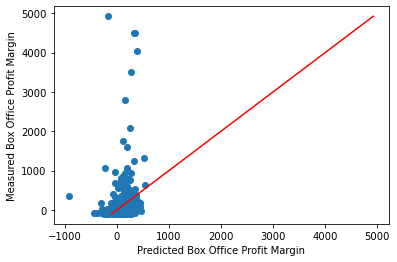

In [128]:
# Plot the predictions
# Build a scatterplot
plt.scatter(predictionMult, y_testMult)

# Add a line for perfect correlation. Can you see what this line is doing? Use plot()
x = np.linspace(min(y_testMult['BoxOfficeProfitMargin']), max(y_testMult['BoxOfficeProfitMargin']), 1000)
plt.plot(x, x, color='r');

# Label it nicely
plt.xlabel("Predicted Box Office Profit Margin")
plt.ylabel("Measured Box Office Profit Margin")
plt.show()

## Conclusions and Next Steps

#### The parameters generated during data wrangling have almost no predictive power when but into a Multiple Linear Regression Model.  Perhaps nonlinear regression models or separating the profit margins into bins to be used in classification models will be more fruitful